Since 1998, the New York City Police Department (NYPD) has been tasked with the collection and maintenance of crime data for incidents that occur in New York City public schools. For presentation purposes, each incident has been classified in one of three categories. These categories are:
<br>
**Major Crimes:** This category is consistent with those regularly and publicly reported by the NYPD. It includes the most serious personal and property crimes. The property crimes are burglary, grand larceny and grand larceny auto. The crimes against persons are murder, rape, robbery and felony assault.
<br>
**Other Crimes:** This category is composed of many crimes and incidents that range in severity. It includes reports of incidents such as arson/explosion, misdemeanor assault, criminal possession or sale of a controlled substance, sale of marijuana, criminal mischief, petit larceny, reckless endangerment, sex offenses (not including rape, which is included in the Major Crimes), and weapons possession.
<br>
**Non-Criminal Incidents:** This category includes actions which are not classified as crimes but are nevertheless disruptive to the school environment. It includes disorderly conduct, harassment, loitering, possession of marijuana, dangerous instruments and trespass.
<br>
NYPD and NYC Department of Education are stored this crime data as annualy school safety reports and published on https://www.data.gov/ . <br>
 __In this Data Analysis exercise, I concatenated the School Safety Reports of the 2015 and 2016, and I will try to Analyse this data.__ <br>


### IMPORTING LIBRARIES

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### STEP 1: EXAMINING DF 

In [5]:
url1 = "C:\\Users\\talfi\\python\\TensorFlow\\self\\schoolsafetynyc\\2015_16ss.csv"
url2 = "C:\\Users\\talfi\\python\\TensorFlow\\self\\schoolsafetynyc\\2016_17ss.csv"
ss1516 = pd.read_csv(url1,encoding='utf-8', quotechar='"', delimiter=',')
ss1617 = pd.read_csv(url2,encoding='utf-8', quotechar='"', delimiter=',')

In [6]:
ss1517 = pd.concat([ss1516,ss1617],axis=0,join="inner")
ss1517.shape

(4116, 20)

We have 4116 rows and 20 columns. This is a fair- sized dataset for our Analysis.

In [7]:
ss1517.head(3)

,Location Name,Location Code,Borough,Geographical District Code,Register,Building Name,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
0,P.S. 001 The Bergen,K001,K,15.0,1280.0,NaN,1.0,P.S. 001 The Bergen,0.0,1.0,0.0,1.0,0.0,7C,1251-1500,0.64,3.02,5.77,1.72,1.54
1,Parkside Preparatory Academy,K002,K,17.0,475.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,NaN,NaN,NaN,NaN,NaN,3C,251-500,NaN,NaN,NaN,NaN,NaN
2,EXPLORE CHARTER SCHOOL(BS),K704,K,17.0,529.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,NaN,NaN,NaN,NaN,NaN,4C,501-750,NaN,NaN,NaN,NaN,NaN


#### Explanation of the Columns is needed to understand our analysis better <br>
* __Location Name__ is the the name by which the organization is known. For a learning community, it is the official title of the school. <br>
* __Location Code__ is a unique identifier that can include schools, administrative offices, learning communities, etc. <br>
* __Borough__ is the NYC Boro the location is situated in. <br>
* __Geographical District Code__ the school’s geographical district as defined by the NYC Department of Education. <br>
* __Register__ Number of students on register. <br>
* __Building Name__ is the the official name of the building a school is located in. <br>
* __# Schools__ is the number of schools in in the building. <br>
* __Schools in the Building__ is the names of the schools in the buildings. <br>
* __Major N__ is the number of major crimes. <br>
* __Oth N__ is the number of other crimes. <br>
* __NoCrim N__ is the number of non - criminal crimes. <br>
* __Prop N__ is the number of property crimes. <br>
* __Vio N__ is the number of violent crimes. <br>
* __EnGroup A__ is the building population. <br>
* __Range A__ is the group name the building population falls under. <br>
* __AvgofMajorN__ is the average of major crimes for all buildings that have the same EnGroupA/Range A. <br>
* __AvgofOthN__ is the average of other crimes for all buildings that have the same EnGroupA/Range A. <br>
* __AvgofNoCrimN__ is the average of non-criminal crimes for all buildings that have the same EnGroupA/Range A. <br>
* __AvgofPropN__ is the average of property crimes for all buildings that have the same EnGroupA/Range A. <br>
* __AvgofVioN__ is the average of violent crimes for all buildings that have the same EnGroupA/Range A. <br>
---
Let's take a breif look of our data.

In [8]:
ss1517.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4116 entries, 0 to 2045
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location Name               4115 non-null   object 
 1   Location Code               3790 non-null   object 
 2   Borough                     4113 non-null   object 
 3   Geographical District Code  4112 non-null   float64
 4   Register                    4046 non-null   float64
 5   Building Name               2373 non-null   object 
 6   # Schools                   4115 non-null   float64
 7   Schools in Building         4115 non-null   object 
 8   Major N                     2401 non-null   float64
 9   Oth N                       2401 non-null   float64
 10  NoCrim N                    2401 non-null   float64
 11  Prop N                      2401 non-null   float64
 12  Vio N                       2401 non-null   float64
 13  ENGroupA                    4073 

While 8 of our column's dtpyes are object, 12 of them's dtypes are float.
___

Let's examine the summary statistics of our ss1517 df:

In [11]:
ss1517.describe()

,Geographical District Code,Register,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
count,4112.000000,4046.000000,4115.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2400.000000,2400.000000,2399.000000,2399.000000,2400.000000
mean,15.419018,687.297084,2.170595,0.426489,1.746772,3.489379,1.052895,0.875052,0.438704,1.836046,3.384894,1.120796,0.879746
std,9.221523,547.373869,1.452559,0.873994,2.849710,7.013974,1.750748,1.689985,0.347415,1.669645,4.018752,0.898922,0.761603
min,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.710000,1.670000,0.510000,0.320000
25%,8.000000,354.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270000,0.900000,1.710000,0.630000,0.440000
50%,14.000000,529.500000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.280000,1.110000,1.740000,0.750000,0.530000
75%,24.000000,850.000000,3.000000,1.000000,2.000000,4.000000,1.000000,1.000000,0.570000,2.120000,3.640000,1.390000,1.050000
max,32.000000,5682.000000,8.000000,8.000000,25.000000,88.000000,16.000000,13.000000,3.140000,13.000000,34.860000,8.290000,5.290000


### STEP 2: LOCATING & REMOVING NA VALUES

Let's check whether our df has Na values or not:

In [12]:
ss1517.isnull().values.any()

True

Appearently, we have some Na values. Let's figure out how many Na values we have:

In [13]:
ss1517.isnull().values.sum()

19392

19392 of our values are Na. Wow!, that's a lot. In that case, we have 3 options: 
<br>
1) We can get rid of them with `ss1517.dropna()` . We can do this but we also loose a lot of useful information because `.dropna()`__drops entire row that has Na value__ , and not every value in that row is Na. That's why we won't go with dropna().
<br>
2) We can use the `value` parameter of the `fillna()` function. In that case, we can only replace Na 's with one variable. If we try to replace them with int or float, we 'll also replace the Na values in the object columns, and the reverse is also applicable. It seems little messy. <br>
3) We can use the `method`parameter of the `fillna()`function. We can set `method='ffill'`to replace Na values with the last valid observation, or we can set `method = 'bfill'`to replace Na values with the next valid observation. If we first set `method = 'ffill'`and then set `method = 'bfill'`, we can remove all Na values with the same dtype of columns. That way we are able to protect our dataframe's structure. That's why we'll go with this option. 

In [14]:
ss1517 = ss1517.fillna(method="ffill") # fills NA values

In [15]:
ss1517 = ss1517.fillna(method="bfill") # fills remaining NA value, only 1

Na values check, once more..

In [16]:
ss1517.isnull().values.any()

False

We don't have any Na values now. 

Everything seems to be in order.

In [19]:
ss1517.head(3)

,Location Name,Location Code,Borough,Geographical District Code,Register,Building Name,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
0,P.S. 001 The Bergen,K001,K,15.0,1280.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,1.0,P.S. 001 The Bergen,0.0,1.0,0.0,1.0,0.0,7C,1251-1500,0.64,3.02,5.77,1.72,1.54
1,Parkside Preparatory Academy,K002,K,17.0,475.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,1.0,0.0,1.0,0.0,3C,251-500,0.64,3.02,5.77,1.72,1.54
2,EXPLORE CHARTER SCHOOL(BS),K704,K,17.0,529.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,1.0,0.0,1.0,0.0,4C,501-750,0.64,3.02,5.77,1.72,1.54


How beautiful does our data sets look like without Na values..

### STEP 3: ANALYSING DATA

__In this dataset, major crimes are coded like this:__<br>
Burglary - 0<br>
Grand larceny - 1<br>
Grand larceny auto - 2<br>
Murder - 3<br>
Rape - 4 <br>
Robbery - 5<br>
Felony - 6<br>
Assault - 8<br>
___
Let's check it out that how is major crimes' distribution in the number of Major Crimes , a.k.a. `Major N`


___
Best way to show dominance is __histogram__ because we are going to show distributions of variables. 

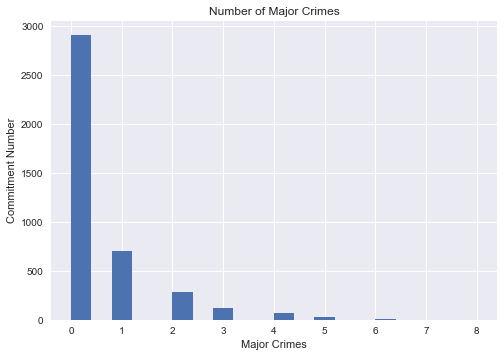

In [140]:
ss1517["Major N"].hist(bins= 20)
plt.title("Number of Major Crimes")
plt.xlabel("Major Crimes")
plt.ylabel("Commitment Number")
plt.style.use("seaborn")

- Though we have 7 different crimes, Burglary(0) and Grand Larcery(1) are so dominant that other crimes couldn't show themselves on the `Major N` .This explanation will be understood better once we plot our `Major N`(Number of Major Crimes) column.
- Wow, so much for the burglary and Grand Larceny. Someone has to teach these kids the meaning of the property rights !
___
Let's separate these two and dive deeper. <br>
As they are dominant in the major crimes, from now on, I will name them as bigtwo.

### BIG TWO

In [40]:
bigtwo = ss1517[ss1517["Major N"] <= 1]

Let's examine our big two.

In [43]:
bigtwo.shape

(3606, 20)

In [44]:
bigtwo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3606 entries, 0 to 2045
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location Name               3606 non-null   object 
 1   Location Code               3606 non-null   object 
 2   Borough                     3606 non-null   object 
 3   Geographical District Code  3606 non-null   float64
 4   Register                    3606 non-null   float64
 5   Building Name               3606 non-null   object 
 6   # Schools                   3606 non-null   float64
 7   Schools in Building         3606 non-null   object 
 8   Major N                     3606 non-null   float64
 9   Oth N                       3606 non-null   float64
 10  NoCrim N                    3606 non-null   float64
 11  Prop N                      3606 non-null   float64
 12  Vio N                       3606 non-null   float64
 13  ENGroupA                    3606 

In [45]:
bigtwo.head()

,Location Name,Location Code,Borough,Geographical District Code,Register,Building Name,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
0,P.S. 001 The Bergen,K001,K,15.0,1280.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,1.0,P.S. 001 The Bergen,0.0,1.0,0.0,1.0,0.0,7C,1251-1500,0.64,3.02,5.77,1.72,1.54
1,Parkside Preparatory Academy,K002,K,17.0,475.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,1.0,0.0,1.0,0.0,3C,251-500,0.64,3.02,5.77,1.72,1.54
2,EXPLORE CHARTER SCHOOL(BS),K704,K,17.0,529.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,1.0,0.0,1.0,0.0,4C,501-750,0.64,3.02,5.77,1.72,1.54
3,P.S. K141,K141,K,17.0,374.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,1.0,0.0,1.0,0.0,3C,251-500,0.64,3.02,5.77,1.72,1.54
4,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,K141,K,17.0,1378.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,3.0,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,3.0,1.0,0.0,1.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82


There might be relevance between the two big crimes and the Borough that they are commited. 
___
To figure out relevance, we need to know our Borough values. Let's find the unique values in Borough column by `unique()`function.


In [48]:
bigtwo['Borough'].unique()

array(['K', 'O', 'M', 'Q', 'R', 'X'], dtype=object)

In that case : <br>
__M__ represents Manhattan. <br>
__Q__ represents Queens. <br>
__R__ represents Rikers Island. <br>
__K__ represents Brooklyn. <br>
__X__ represents The Bronx. <br>
__O__ represents Staten Island. <br>

Now, as we know Borough's and their actual names, we can examine the relationship between the bigtwo and Boroughs. We can do this through grouping them by Borough's. In that case, the most handy tool is  `groupby()`function.

In [51]:
bigtwo.groupby("Borough")["Major N"].sum()

Borough
K    233.0
M    161.0
O      0.0
Q     87.0
R     18.0
X    201.0
Name: Major N, dtype: float64

Well, it seems that burglary and grand larceny crimes are commited in Brooklyn first place, then the Bronx, then Manhattan. We can say that burglary and grand larceny crimes in NYC Public Schools are not relevant with the wealth because the richest borough of the NYC is Manhattan; and there are more burglary and grand larceny crimes commited in Manhattan than the poorest Borough in NYC, the Bronx.
___
Hmm, how about adding a new variable in our equasion and looking from different perspective ? <br>
Let's examine our big two by the Borough's and the number of students in each schools, a.k.a. `Register` <br>
That way, we can evaluate our bigtwo not only with Borough's and the wealth of them, but also with the population's of Borough's and their effects on burglary and grand larceny.
___


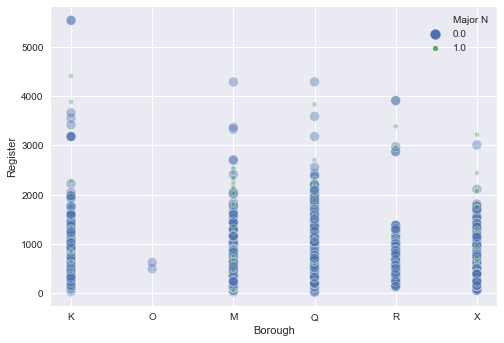

In [57]:
sns.scatterplot(x = "Borough", y = "Register", data = bigtwo, hue = "Major N", size = "Major N", alpha = 0.4)

Now, we know that the number one borough for our bigtwo has also the most populated schools, but it is very hard to distinguish the burglary and grand larceny with this plot. Instead of plotting them in single plot, we can plot them by two subplots.
___
We can do this by `Seaborn's relplot()`

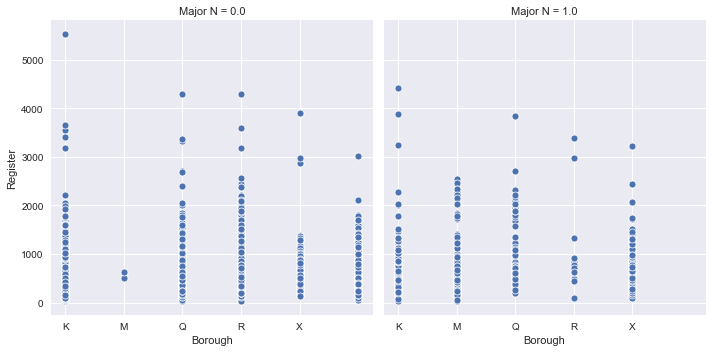

In [62]:
sns.relplot( x = "Borough", y = "Register", data = bigtwo, kind = "scatter",col = "Major N", col_wrap = 2)

Now, we can say that there are much more grand larceny crime is commited than burglary in Manhattan. For other Borough's , everything is pretty much same. 

### OTHER MAJOR CRIMES

Now, it is time to talk about the other major crimes : <br>
Grand larceny auto - 2<br>
Murder - 3<br>
Rape - 4 <br>
Robbery - 5<br>
Felony - 6<br>
Assault - 8<br>
___
As they did not occur as frequent as the burglary and the grand larceny, their contest is much more serious than bigtwo. Let's create a new dataframe and name it as othercrimes:

In [110]:
othercrimes = ss1517[ss1517["Major N"] > 1]

Let's examine the other crimes: 

In [64]:
othercrimes.shape

(510, 20)

In [65]:
othercrimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 9 to 2031
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location Name               510 non-null    object 
 1   Location Code               510 non-null    object 
 2   Borough                     510 non-null    object 
 3   Geographical District Code  510 non-null    float64
 4   Register                    510 non-null    float64
 5   Building Name               510 non-null    object 
 6   # Schools                   510 non-null    float64
 7   Schools in Building         510 non-null    object 
 8   Major N                     510 non-null    float64
 9   Oth N                       510 non-null    float64
 10  NoCrim N                    510 non-null    float64
 11  Prop N                      510 non-null    float64
 12  Vio N                       510 non-null    float64
 13  ENGroupA                    510 no

In [67]:
othercrimes.head(3)

,Location Name,Location Code,Borough,Geographical District Code,Register,Building Name,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
9,P.S. 008 Robert Fulton,K008,K,13.0,924.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,1.0,P.S. 008 Robert Fulton,3.0,0.0,0.0,3.0,0.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82
10,P.S. 009 Teunis G. Bergen,K009,K,13.0,838.0,80 UNDERHILL AVENUE CONSOLIDATED LOCATION,2.0,P.S. 009 Teunis G. Bergen|Brooklyn East Colleg...,3.0,0.0,0.0,3.0,0.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82
11,BROOKLYN EAST COLLEGIATE CHARTER SCHOOL(BN),K780,K,13.0,388.0,80 UNDERHILL AVENUE CONSOLIDATED LOCATION,2.0,P.S. 009 Teunis G. Bergen|Brooklyn East Colleg...,3.0,0.0,0.0,3.0,0.0,3C,251-500,0.38,1.71,2.38,0.98,0.82


It seems that we won't use some of the columns in our dataset. Let's get rid of them. <br>
We can do this by `drop()`function of Pandas. With `drop`we can drop columns.
___
After careful review, we think that `Location Code` column is unnecessary for our analysis. Let's get drop it.

In [111]:
othercrimes = othercrimes.drop("Location Code", axis = 1)
othercrimes.head()

,Location Name,Borough,Geographical District Code,Register,Building Name,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
9,P.S. 008 Robert Fulton,K,13.0,924.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,1.0,P.S. 008 Robert Fulton,3.0,0.0,0.0,3.0,0.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82
10,P.S. 009 Teunis G. Bergen,K,13.0,838.0,80 UNDERHILL AVENUE CONSOLIDATED LOCATION,2.0,P.S. 009 Teunis G. Bergen|Brooklyn East Colleg...,3.0,0.0,0.0,3.0,0.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82
11,BROOKLYN EAST COLLEGIATE CHARTER SCHOOL(BN),K,13.0,388.0,80 UNDERHILL AVENUE CONSOLIDATED LOCATION,2.0,P.S. 009 Teunis G. Bergen|Brooklyn East Colleg...,3.0,0.0,0.0,3.0,0.0,3C,251-500,0.38,1.71,2.38,0.98,0.82
69,272 MACDONOUGH STREET CONSOLIDATED LOCATION,K,16.0,390.0,272 MACDONOUGH STREET CONSOLIDATED LOCATION,2.0,Brooklyn Brownstone School | M.S. 035 Stephen...,2.0,0.0,1.0,1.0,1.0,3C,251-500,0.27,0.90,1.67,0.63,0.44
74,265 RALPH AVENUE CONSOLIDATED LOCATION,K,16.0,493.0,265 RALPH AVENUE CONSOLIDATED LOCATION,2.0,P.S. 040 George W. Carver | Gotham Profession...,2.0,2.0,1.0,3.0,1.0,3C,251-500,0.27,0.90,1.67,0.63,0.44


Great ! In order to make smooother analysis, we'll only need 3 columns : <br>
`# Schools` : Number of schools in the building. We are going to need this column because different schools means different population categories such as age and culture. Different categories might be the major crimes in school. <br>
`EnGroupA`: Building population. <br>
`Major N`: Other major crimes.

To study with only these 3 columns, we need to reshape our df.We can do this by `loc`and `iloc`

In [112]:
othercrimes = othercrimes.iloc[:,[5,7,12]]

In [113]:
othercrimes.head()

,# Schools,Major N,ENGroupA
9,1.0,3.0,5C
10,2.0,3.0,5C
11,2.0,3.0,3C
69,2.0,2.0,3C
74,2.0,2.0,3C


Let's sort the values by Major N codes to see the relevance better.

In [114]:
othercrimes = othercrimes.sort_values(by = "Major N")
othercrimes.head(3)

,# Schools,Major N,ENGroupA
1949,6.0,2.0,10C
258,2.0,2.0,4C
257,2.0,2.0,9C


- Great! To see the effects of Building Population and Number of Other Schools in the Building on Other Major Crimes, let's pivot it. We can pivot it by `pivot_table`function of pandas.
- That way we can see the distribution of Other Major Crimes(`Major N`) based on building population(`EnGreoupA`) and number of schools in the building(`# Schools`). This would allow us to see if there is any correlation between the number of schools in the building, the population of the building, and the occurance of major crimes.

In [117]:
pivot_table = othercrimes.pivot_table(index=["ENGroupA"],
                                     columns="# Schools", 
                                     values='Major N')
pivot_table

# Schools,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
ENGroupA,,,,,,,,
10C,2.200000,3.166667,4.500000,2.250000,2.000000,2.428571,5.000000,4.0
11C,2.000000,5.000000,NaN,NaN,4.000000,3.500000,3.200000,NaN
12C,2.818182,3.000000,NaN,NaN,NaN,NaN,3.500000,NaN
13C,2.750000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
2C,2.333333,2.304348,3.117647,4.500000,3.142857,3.000000,2.000000,NaN
3C,2.200000,2.418605,2.729730,3.666667,2.619048,3.454545,2.263158,NaN
4C,2.333333,2.470588,2.400000,3.000000,3.000000,3.666667,2.500000,NaN
5C,2.333333,2.266667,2.666667,2.666667,2.000000,NaN,NaN,NaN
6C,2.666667,2.416667,2.315789,2.000000,NaN,NaN,3.000000,NaN


We have Na values, again.. Although we are trying to understand correlation, replacing Na values will provide better insight for us. Let's replace them as we did earlier, with `bfill`and `ffill`parameters of `pd.fillna()`

In [125]:
pivot_table = pivot_table.fillna(method = 'bfill')

In [126]:
pivot_table = pivot_table.fillna(method = 'ffill')

In [127]:
pivot_table.isnull().values.any()

False

In [128]:
pivot_table.head()

# Schools,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
ENGroupA,,,,,,,,
10C,2.200000,3.166667,4.500000,2.25,2.000000,2.428571,5.0,4.0
11C,2.000000,5.000000,3.117647,4.50,4.000000,3.500000,3.2,4.0
12C,2.818182,3.000000,3.117647,4.50,3.142857,3.000000,3.5,4.0
13C,2.750000,3.000000,3.117647,4.50,3.142857,3.000000,2.0,4.0
2C,2.333333,2.304348,3.117647,4.50,3.142857,3.000000,2.0,4.0


Great ! In order to make smooother analysis, we'll only need 3 columns : <br>
`# Schools` : Number of schools in the building. We are going to need this column because different schools means different population categories such as age and culture. Different categories might be the major crimes in school. <br>
`EnGroupA`: Building population. <br>
`Major N`: Other major crimes.

It seems that our pivot will be useful if we want to look the direct relationship, but it is also not easy to understand. Let's keep it simple for everyone, and use scatter plot. <br>
Let's examine the effects of number of schools in the building and building population on other major crimes. In that case, scatter plot serves our purpose best because we are trying to show the relationship between two variables and effect of these two on third variable, other major crimes.

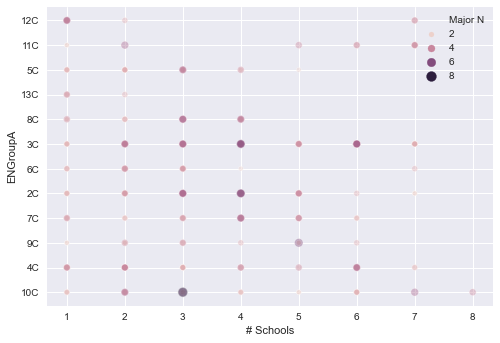

In [145]:
sns.scatterplot(x = "# Schools", y = "ENGroupA", data = othercrimes, hue = "Major N", size = "Major N", alpha = 0.4)

Well, let's see.. Major crime number 6(felony) is very dense in the buildings with 3 schools. There is also a linear relationship between the building population and major crime kind in the buildings with 1 school. 